In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

data = pd.read_csv(r"C:\Users\Admin\Downloads\archive (1)\headbrain.csv")

x = np.array(data['Head Size(cm^3)'])
y = np.array(data['Brain Weight(grams)'])

print(x[:5], y[:5])

[4512 3738 4261 3777 4177] [1530 1297 1335 1282 1590]


In [11]:
# Manual Linear Regression
def get_line(x, y):
    x_m, y_m = np.mean(x), np.mean(y)
    print("Mean X:", x_m, "Mean Y:", y_m)
    x_d, y_d = x - x_m, y - y_m
    m = np.sum(x_d * y_d) / np.sum(x_d ** 2)
    c = y_m - (m * x_m)
    print("Slope (m):", m, "Intercept (c):", c)
    return lambda x: m * x + c
lin = get_line(x, y)

Mean X: 3633.9915611814345 Mean Y: 1282.873417721519
Slope (m): 0.2634293394893993 Intercept (c): 325.5734210494428


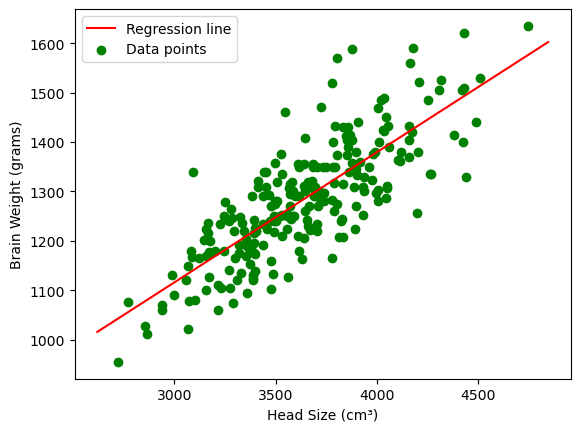

In [12]:
# Plot
X = np.linspace(np.min(x) - 100, np.max(x) + 100, 1000)
Y = np.array([lin(_) for _ in X])

plt.plot(X, Y, color='red', label='Regression line')
plt.scatter(x, y, color='green', label='Data points')
plt.xlabel('Head Size (cm³)')
plt.ylabel('Brain Weight (grams)')
plt.legend()
plt.show()

In [13]:
# Manual R² Score
def get_error(line_func, x, y):
    y_m = np.mean(y)
    y_pred = np.array([line_func(_) for _ in x])
    ss_t = np.sum((y - y_m) ** 2)
    ss_r = np.sum((y - y_pred) ** 2)
    return 1 - (ss_r / ss_t)

manual_r2 = get_error(lin, x, y)
print("Manual R² Score:", manual_r2)


Manual R² Score: 0.639311719957


In [14]:
# Using Scikit-learn
x = x.reshape((-1, 1))
reg = LinearRegression()
reg.fit(x, y)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [15]:
print("Sklearn Coeff:", reg.coef_[0])
print("Sklearn Intercept:", reg.intercept_)
print("Sklearn R² Score:", reg.score(x, y))


Sklearn Coeff: 0.26342933948939934
Sklearn Intercept: 325.5734210494426
Sklearn R² Score: 0.639311719957
